In [50]:
import pandas as pd
df = pd.read_csv("train.csv")

In [51]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [23]:
#DAtaframe of racist/sexist tweets
df1 = df[df["label"] == 1]

In [24]:
df1

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [3]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis


import matplotlib.pyplot as plt

In [4]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') 
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nelson\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [25]:
words = basic_clean(''.join(str(df1['tweet'].tolist())))

In [26]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(user, user)           530
(user, allahsoil)       83
(libtard, sjw)          72
(sjw, liberal)          72
(liberal, politics)     72
(libtard, libtard)      72
(might, libtard)        72
(feel, like)            51
(listen, retweet)       51
(amp, feel)             49
dtype: int64

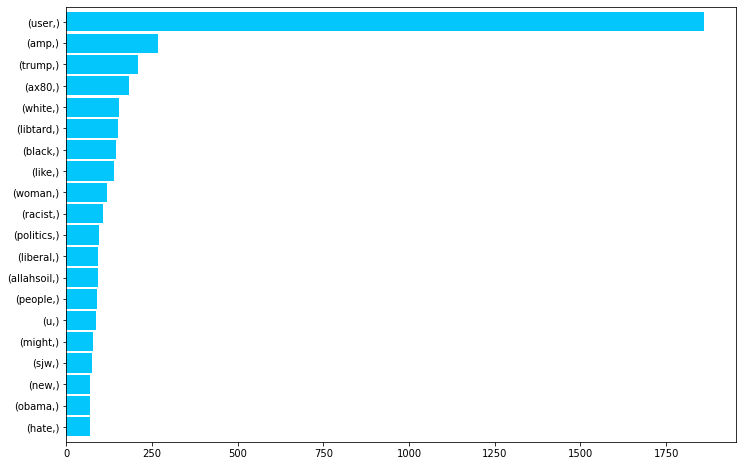

In [27]:
unigram_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]
unigram_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("unigram_series.jpg",dpi=150)

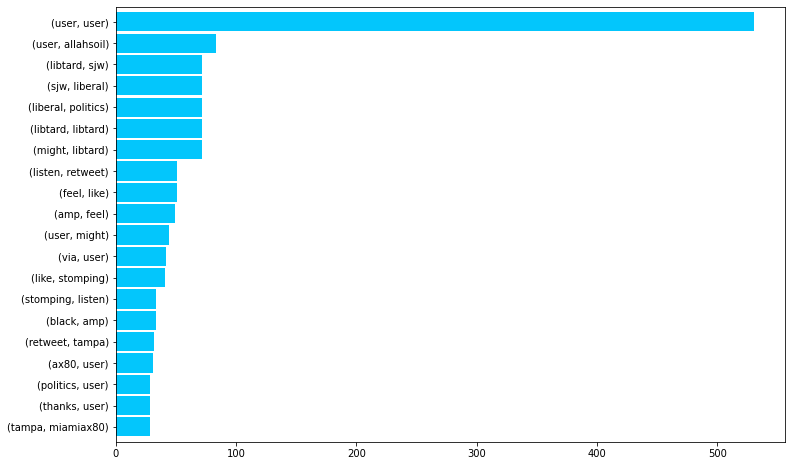

In [28]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
bigrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("bigrams_series.jpg",dpi=150)

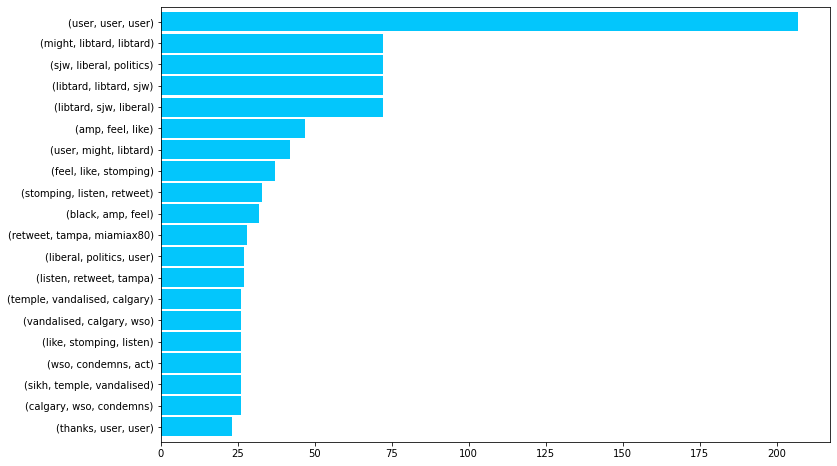

In [29]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("trigrams_series.jpg",dpi=150)

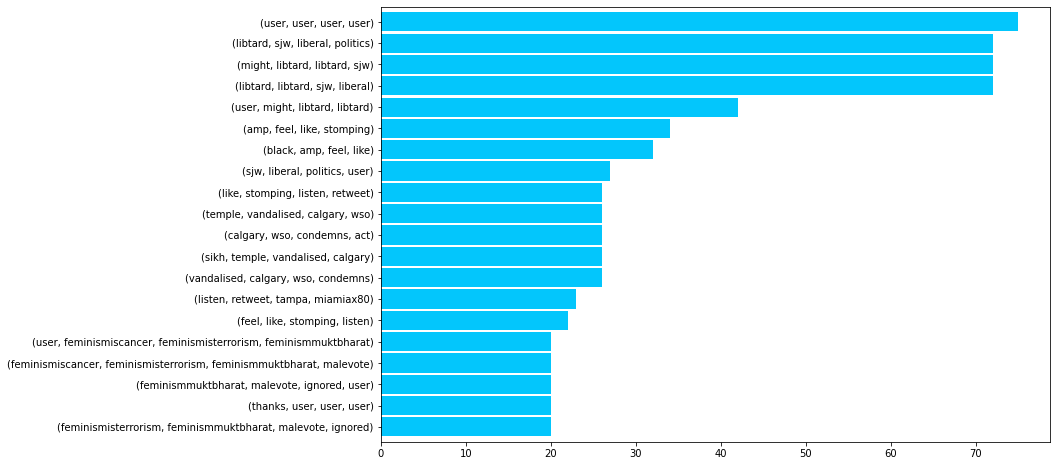

In [30]:
quadgrams_series = (pd.Series(nltk.ngrams(words, 4)).value_counts())[:20]
quadgrams_series.sort_values().plot.barh(color='#03c6fc', width=.9, figsize=(12, 8))
plt.savefig("quadgrams_series.jpg",dpi=150)

In [31]:
# text of racist/sexist tweets
text =" ".join(tweet for tweet in df1.tweet)

In [ ]:
text

In [33]:
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

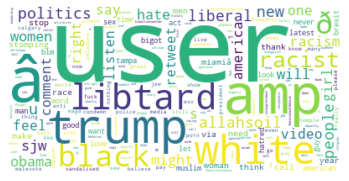

In [34]:
#plt.figure(dpi=100)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordclouds.jpg",dpi=100)
plt.show()
#plt.savefig("cloudword2.png",dpi=600)

In [42]:
#Adding a column to show label Name of each tweet
df.loc[(df.label == 0),'labelname'] = 'Not Racist/Sexist'
df.loc[(df.label == 1),'labelname'] = 'Racist/Sexist'


In [43]:
df

,id,label,tweet,labelname
0,1,0,@user when a father is dysfunctional and is s...,Not Racist/Sexist
1,2,0,@user @user thanks for #lyft credit i can't us...,Not Racist/Sexist
2,3,0,bihday your majesty,Not Racist/Sexist
3,4,0,#model i love u take with u all the time in ...,Not Racist/Sexist
4,5,0,factsguide: society now #motivation,Not Racist/Sexist
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,Not Racist/Sexist
31958,31959,0,to see nina turner on the airwaves trying to...,Not Racist/Sexist
31959,31960,0,listening to sad songs on a monday morning otw...,Not Racist/Sexist
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",Racist/Sexist


<AxesSubplot:>

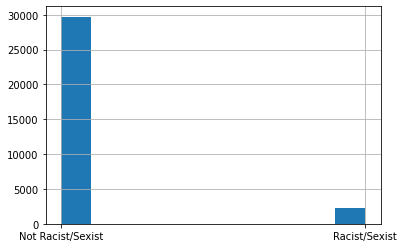

In [44]:
# label distribution
df['labelname'].hist()

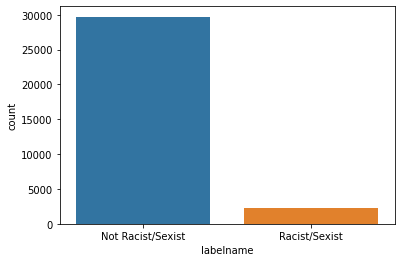

In [45]:
import seaborn as sns
sns.countplot(x=df["labelname"], data=df)
plt.savefig("countplot.jpg",dpi=100)

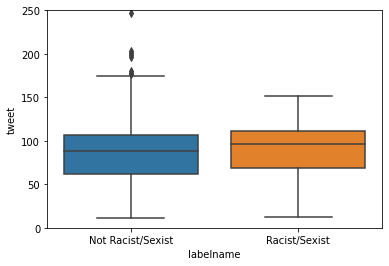

In [46]:
import matplotlib.pyplot as plt
plt.ylim(0, 250)
sns.boxplot(x=df["labelname"],y=df["tweet"].str.len(), data=df)
plt.savefig("boxplot.jpg",dpi=100)